In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel(r'Planilhas de Dados/24.04.xlsx')
df.head()

,vehicle_id,vehicle_current_status,patent,vehicle_model,vehicle_type,kilometer,latitude,longitude,zone_name
0,12,ACTIVE,HKQ6C99,Fiorino,Cargo,2090.41,-23.630684,-46.699818,Pare na Rua
1,19,ACTIVE,BNI7Q48,Fiorino,Cargo,217.11,-23.620918,-46.685555,Pare na Rua
2,20,ACTIVE,KIQ2T57,Tracker,SUV,265.11,-23.627500,-46.669334,Pare na Rua
3,21,ACTIVE,FRB5B87,Fiorino,Cargo,389.96,-23.603878,-46.658375,Atlas- Moema
4,22,ACTIVE,BBC8E14,Fiorino,Cargo,545.40,-23.549618,-46.615220,Trevo - Rua Alegria


In [4]:
print(f'As dimensões do dataframe são:\n Linhas: {df.shape[0]}\n Colunas: {df.shape[1]}\n')

colunas = df.columns.to_list()
print(f'Nome das colunas:')
for coluna in colunas:
    print(' ' + coluna)

As dimensões do dataframe são:
 Linhas: 170
 Colunas: 9

Nome das colunas:
 vehicle_id
 vehicle_current_status
 patent
 vehicle_model
 vehicle_type
 kilometer
 latitude
 longitude
 zone_name


In [5]:
df.isnull().sum()

vehicle_id                0
vehicle_current_status    0
patent                    0
vehicle_model             0
vehicle_type              0
kilometer                 0
latitude                  0
longitude                 0
zone_name                 1
dtype: int64

In [6]:
df = df.fillna('Pare na Rua')

In [7]:
df.isnull().sum()

vehicle_id                0
vehicle_current_status    0
patent                    0
vehicle_model             0
vehicle_type              0
kilometer                 0
latitude                  0
longitude                 0
zone_name                 0
dtype: int64

In [8]:
df.dtypes

vehicle_id                  int64
vehicle_current_status     object
patent                     object
vehicle_model              object
vehicle_type               object
kilometer                 float64
latitude                  float64
longitude                 float64
zone_name                  object
dtype: object

In [9]:
carros = df.vehicle_model.unique().tolist()
print(f'Os carros desse dataframe são: {carros}')
contagem_modelos = df.groupby('vehicle_model').vehicle_id.count().reset_index()
contagem_modelos = contagem_modelos.sort_values(by=['vehicle_id'], ascending=False).reset_index()
contagem_modelos

Os carros desse dataframe são: ['Fiorino', 'Tracker', 'Stonic', 'Onix']


,index,vehicle_model,vehicle_id
0,1,Onix,86
1,2,Stonic,30
2,0,Fiorino,27
3,3,Tracker,27


In [10]:
categoria_carros = df.vehicle_type.unique().tolist()
print(f'As categorias dos carros disponiveis são: {categoria_carros}')

contagem_categorias = df.groupby('vehicle_type').vehicle_id.count().reset_index()
contagem_categorias = contagem_categorias.sort_values(by=['vehicle_id'], ascending=False).reset_index()
contagem_categorias


As categorias dos carros disponiveis são: ['Cargo', 'SUV', 'Hybrid', 'Top Sedan']


,index,vehicle_type,vehicle_id
0,3,Top Sedan,86
1,1,Hybrid,30
2,0,Cargo,27
3,2,SUV,27


In [11]:
carros_unicos = df.vehicle_id.unique().tolist()
print(f'O número de carros únicos são: {len(carros_unicos)}')

O número de carros únicos são: 170


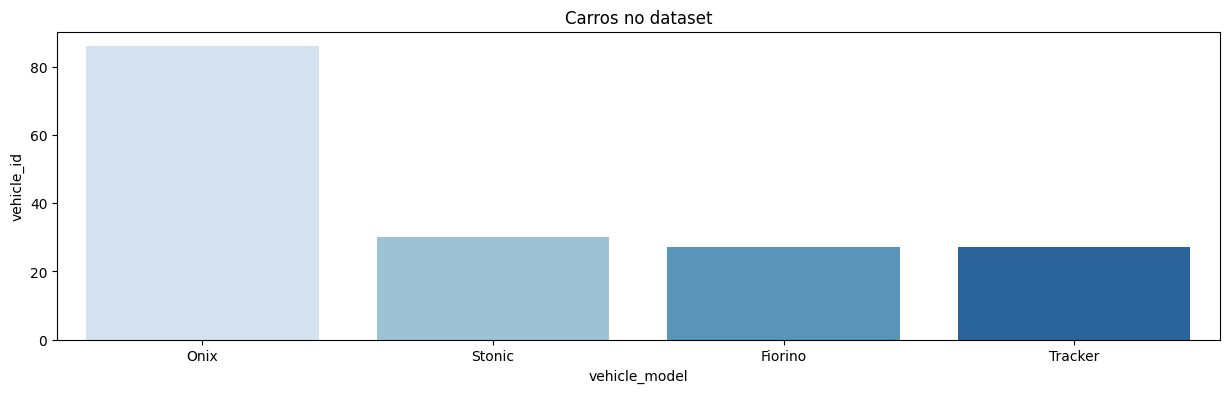

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x='vehicle_model', y='vehicle_id', data=contagem_modelos, palette='Blues')
plt.title('Carros no dataset')
plt.show()

In [21]:
carros_rua = df[df['zone_name'] == 'Pare na Rua']
carros_rua

,vehicle_id,vehicle_current_status,patent,vehicle_model,vehicle_type,kilometer,latitude,longitude,zone_name
0,12,ACTIVE,HKQ6C99,Fiorino,Cargo,2090.41,-23.630684,-46.699818,Pare na Rua
1,19,ACTIVE,BNI7Q48,Fiorino,Cargo,217.11,-23.620918,-46.685555,Pare na Rua
2,20,ACTIVE,KIQ2T57,Tracker,SUV,265.11,-23.627500,-46.669334,Pare na Rua
5,23,ACTIVE,XOK5E95,Fiorino,Cargo,389.14,-23.632570,-46.700780,Pare na Rua
6,24,ACTIVE,UBL6B74,Fiorino,Cargo,282.53,-23.577509,-46.667316,Pare na Rua
...,...,...,...,...,...,...,...,...,...
165,256,ACTIVE,ESO0K81,Onix,Top Sedan,603.27,-23.556932,-46.678770,Pare na Rua
166,257,ACTIVE,GSS7E46,Onix,Top Sedan,707.46,-23.615988,-46.689922,Pare na Rua
167,258,ACTIVE,WLB3Y56,Onix,Top Sedan,794.08,-23.600714,-46.668507,Pare na Rua
168,259,ACTIVE,RCE0U22,Onix,Top Sedan,703.83,-23.557652,-46.673916,Pare na Rua


In [41]:
elegiveis_abastescimento = carros_rua.sort_values(by='kilometer', ascending=False)
elegiveis_abastescimento

,vehicle_id,vehicle_current_status,patent,vehicle_model,vehicle_type,kilometer,latitude,longitude,zone_name
118,184,ACTIVE,BNF4R21,Stonic,Hybrid,2319.90,-23.602146,-46.680737,Pare na Rua
0,12,ACTIVE,HKQ6C99,Fiorino,Cargo,2090.41,-23.630684,-46.699818,Pare na Rua
110,167,ACTIVE,RAE9W63,Stonic,Hybrid,1967.44,-23.624199,-46.667942,Pare na Rua
117,183,ACTIVE,UFJ7R16,Stonic,Hybrid,1567.73,-23.554174,-46.678070,Pare na Rua
130,199,ACTIVE,WNN2M40,Stonic,Hybrid,1412.94,-23.558820,-46.674650,Pare na Rua
...,...,...,...,...,...,...,...,...,...
41,64,ACTIVE,BVZ3Z79,Fiorino,Cargo,155.53,-23.629198,-46.688710,Pare na Rua
25,46,ACTIVE,ERF8I99,Tracker,SUV,150.72,-23.628992,-46.670220,Pare na Rua
65,111,ACTIVE,KDQ4C39,Onix,Top Sedan,140.27,-23.574835,-46.663486,Pare na Rua
9,28,ACTIVE,ARY7E70,Tracker,SUV,114.63,-23.620857,-46.673138,Pare na Rua


In [42]:
elegiveis_abastescimento.head(35)

,vehicle_id,vehicle_current_status,patent,vehicle_model,vehicle_type,kilometer,latitude,longitude,zone_name
118,184,ACTIVE,BNF4R21,Stonic,Hybrid,2319.90,-23.602146,-46.680737,Pare na Rua
0,12,ACTIVE,HKQ6C99,Fiorino,Cargo,2090.41,-23.630684,-46.699818,Pare na Rua
110,167,ACTIVE,RAE9W63,Stonic,Hybrid,1967.44,-23.624199,-46.667942,Pare na Rua
117,183,ACTIVE,UFJ7R16,Stonic,Hybrid,1567.73,-23.554174,-46.678070,Pare na Rua
130,199,ACTIVE,WNN2M40,Stonic,Hybrid,1412.94,-23.558820,-46.674650,Pare na Rua
119,185,ACTIVE,KZY7C37,Stonic,Hybrid,1393.07,-23.574253,-46.693626,Pare na Rua
104,155,ACTIVE,DUG2D93,Stonic,Hybrid,1334.16,-23.579613,-46.668530,Pare na Rua
151,242,ACTIVE,CAR1B83,Onix,Top Sedan,1227.97,-23.577827,-46.647280,Pare na Rua
108,162,ACTIVE,DEM7F09,Stonic,Hybrid,1224.79,-23.610468,-46.691470,Pare na Rua
122,188,ACTIVE,JKW0N42,Stonic,Hybrid,1151.58,-23.575450,-46.680325,Pare na Rua


In [48]:
import os

dir = os.listdir('Planilhas de Dados')

for i in dir:
    df = pd.read_excel(r'./Planilhas de dados/' + i)
    print(df.vehicle_model.unique())

['Fiorino' 'Tracker' 'Stonic' 'Onix']
['Fiorino' 'Tracker' 'Stonic' 'Onix']
['Fiorino' 'Tracker' 'Stonic' 'Onix']
['Fiorino' 'Tracker' 'Stonic' 'Onix']
['Fiorino' 'Tracker' 'Stonic' 'Onix']
['Fiorino' 'Tracker' 'Stonic' 'Onix']
